# Tarea 7: Ecuaciones diferenciales ordinarias


1. **Fácil:** Compara los errores y tiempos de medición de 3 métodos para resolver ecuaciones diferenciales (puedes incluir SymPy pero no es obligatorio). 

    (i) Para esto elige 2 ecuaciones diferenciales de las que tengas la solución. Por ejemplo, puede ser la ecuación logística y la ecuación $y' = y$, cuya solución es una exponencial, pero puedes usar otras si quieres. Obten el error relativo $|y_r(t)-y_e(t)|/|y_r(t)|$, donde $y_r$ es la solución analítica y $y_e$ es la solución estimada para cada método como función de $t$. Grafíca los 3 errores relativos como función de $t$ para cada una de las 2 ecuaciones diferenciales que elegiste. 
    
    (ii) Mide el tiempo de cómputo con los 3 métodos para ambas ecuaciones como función de $h$ (elige un rango de $t$ pequeño para que no tarde demasiado tu medición). Para esto no es necesario que uses Benchmarktools, basta con @elapse (Benchmarktools es lo mejor, pero puede ser muy tardado).   

**Solución**

**(i)**

In [26]:
###### Usaremos los métodos de Euler, taylor grado 5 y Runge-Kuta 4 
### Euler
function solucionador_euler(g, x_0, t, h = 0.01)
    n = floor(Int, t/h)+1
    X = [zero(x_0) for i in 1:n]
    X[1] = x_0
    for i in 2:n
        X[i] = X[i-1]+h*g(X[i-1], h*(i-1))
    end
    return X
end

#### Taylor
using SymPy

function calcula_Taylor(f, n)
    @vars y t h
    @syms x()
    series = [x(t), h*f(x(t),t)]
    for i ∈ 2:n
        push!(series,h/i * series[i].diff(t).subs(x(t).diff(t), f(x(t), t)))
    end
    expr = simplify(sum(series))
    expr2 = expr.subs(x(t), y)
    f2(y1, t1,h1 = 0.01)  = N(expr2(y => y1, t => t1, h => h1).evalf())
end

function solucionador_Taylor_1D(f, x₀, n, time, h1 = 0.01)
    f2 = calcula_Taylor(f, n)
    pasos = floor(Int,time/h1)+1
    X = zeros(pasos)
    X[1] = x₀
    t = 0
    for i ∈ 1:pasos-1
        X[i+1] = f2(X[i], t, h1)
        t += h1
    end
    return X
end

#### Runge-Kuta 4

function RK4(f, x0, t, h = 0.01) # es de orden 4, así que en realidad el error en cada paso será 10^-8
    t0 = 0
    n = floor(Int, (t/h))
    X = [zero(x0) for i in 1:n+1]
    X[1] = x0
    for i in 2:n+1
        k1 = f(x0, t0)
        k2 = f(x0 .+ h*k1./2, t0 + h/2)
        k3 = f(x0 .+ h*k2./2, t0 + h/2)
        k4 = f(x0 .+ h*k3, t0 + h)  
        x0 = x0 .+ h/6 .* (k1 .+ 2*k2 .+ 2*k3 .+ k4) 
        t0 += h
        X[i] = x0
    end
    return X
end 


RK4 (generic function with 2 methods)

In [27]:
#Vamos a tomar las ecuaciones logística y la ecuación y'=y

##### La solución analítica de la ecuación y' = y :  ######
y0 = 5.0
y(t) = 5.0*exp(t)

##### la solución analítica de la ecuación logística:  ######
P0 = 0.1 #población inicial
K = 3.0 #capacidad de persistecia
r0 = 2.0 #taza de crecimiento

P(t) = (K*P0*exp(r0*t))/(K+P0*(exp(r0*t)-1.0)) 


P (generic function with 1 method)

In [28]:
#Ahora las funciones de las ecuaciones diferenciales: 
#### y'=y^2
gs(y,t) = y
#### Logistica
hs(P,t) = P*r0*(1-P/K)

#Calculamos los errores relativos


hs (generic function with 1 method)

Ahora haremos las gráficas. Primero las de $y' = y^2$

In [78]:
#Primera función
tf = 10
SolEuler_1 = solucionador_euler(gs,y0,tf,0.01)
SolTaylor_1 = solucionador_Taylor_1D(gs,y0,5,tf,0.01)
SolRK4_1 = RK4(gs,y0,tf,0.01)
n = size(SolEuler_1)[1]-1
t = 0:tf/n:tf
 
SolAn1 = y.(t)

ErrEuler1 = abs.((SolEuler_1.-SolAn1)./SolAn1)
ErrTaylor1 = abs.((SolTaylor_1.-SolAn1)./SolAn1)
ErrRK41 = abs.((SolRK4_1.-SolAn1)./SolAn1)

1001-element Array{Float64,1}:
 0.0
 8.264045747785326e-13
 1.6527305403406918e-12
 2.4792519439200055e-12
 3.3055460337831373e-12
 4.1322173374007606e-12
 4.9585048556787705e-12
 5.784833758300865e-12
 6.6112812741921055e-12
 7.43775589065195e-12
 8.2641663620352e-12
 9.090421744917552e-12
 9.916904078217478e-12
 ⋮
 8.173270901617683e-10
 8.181531935288777e-10
 8.189793802787568e-10
 8.198057424745926e-10
 8.206319320637099e-10
 8.214580243718595e-10
 8.222843583566679e-10
 8.231123484398487e-10
 8.239385758741742e-10
 8.247647333041005e-10
 8.255909676795478e-10
 8.264172766881136e-10

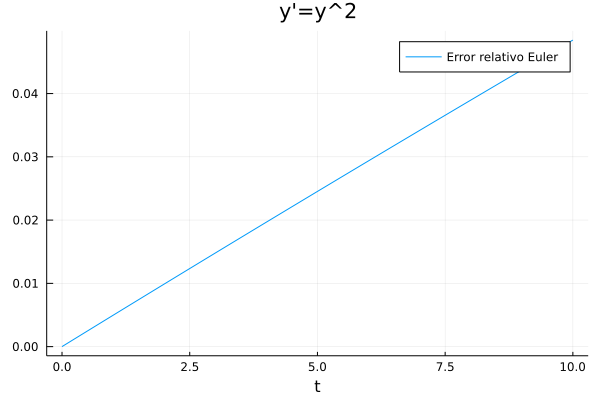

In [79]:
using Plots
Plots.gr()
plot(t,ErrEuler1,label = "Error relativo Euler",title = "y'=y^2", xlabel = "t")

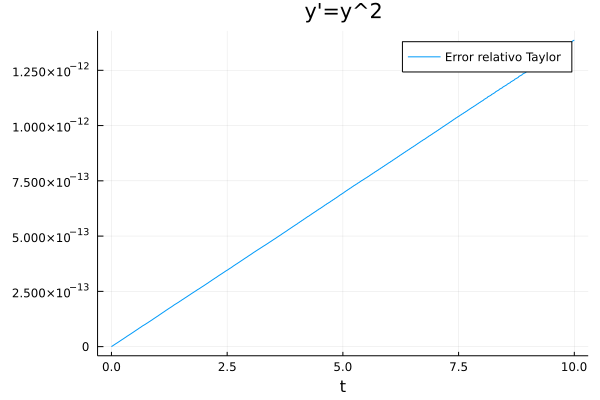

In [80]:
plot(t,ErrTaylor1,label = "Error relativo Taylor",title = "y'=y^2", xlabel = "t")

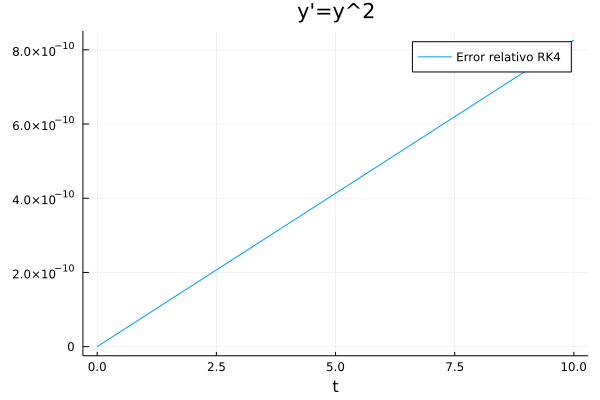

In [81]:
plot(t,ErrRK41,label = "Error relativo RK4",title = "y'=y^2", xlabel = "t")

Vemos que los errores relativos crecen linealmente en todos los casos, además notamos que el método de taylor de grado 5 es el que tiene el error relativo menor.

In [82]:
#Segunda ecuación función (Logística)
tf = 10
SolEuler_2 = solucionador_euler(hs,P0,tf,0.01)
SolTaylor_2 = solucionador_Taylor_1D(hs,P0,5,tf,0.01)
SolRK4_2 = RK4(hs,P0,tf,0.01)
n = size(SolEuler_2)[1]-1
t = 0:tf/n:tf
 
SolAn2 = P.(t)

ErrEuler2 = abs.((SolEuler_2.-SolAn2)./SolAn2)
ErrTaylor2 = abs.((SolTaylor_2.-SolAn2)./SolAn2)
ErrRK42 = abs.((SolRK4_2.-SolAn2)./SolAn2)

1001-element Array{Float64,1}:
 1.3877787807814454e-16
 2.136835173774914e-11
 4.2635407607962395e-11
 6.379930814595433e-11
 8.485816701949131e-11
 1.0581020344081914e-10
 1.2665336543417883e-10
 1.4738584470708875e-10
 1.6800570180580333e-10
 1.885106498194785e-10
 2.0889912282402874e-10
 2.291692035188952e-10
 2.493185508951421e-10
 ⋮
 1.924386719349698e-15
 1.9243867165115193e-15
 1.7763569665195758e-15
 1.776356964002444e-15
 1.7763569615351554e-15
 1.776356959116722e-15
 1.7763569567461772e-15
 1.6283272082206914e-15
 1.6283272061328964e-15
 1.6283272040864424e-15
 1.6283272020805109e-15
 1.6283272001142997e-15

In [83]:
plotly()
plot(t,ErrEuler2,label = "Error relativo Euler",title = "P'= P r_0 (1-P/K)", xlabel = "t")

In [84]:
plot(t,ErrTaylor2,label = "Error relativo Taylor",title = "P'= P r_0 (1-P/K)", xlabel = "t")

In [85]:
plot(t,ErrRK42,label = "Error relativo RK4",title = "P'= P r_0 (1-P/K)", xlabel = "t")

En este caso, el error crece rapidamente al principio en todos los casos, y nuevamente decrece. El método que muestra el mayor error es el de Euler, y el de menor error es Taylor de grado 5

**(ii)**

Vamos a hacer ahora las pruebas de tiempo


In [86]:
#h = 0.001:0.0001:0.01

tf = 0.1
tiempoEuler1(h) =  @elapsed SolEuler_1 = solucionador_euler(gs,P0,tf,h)
tiempoTaylor1(h) =  @elapsed SolTaylor_1 = solucionador_Taylor_1D(gs,P0,5,tf,h)
tiempoRK41(h) =  @elapsed SolRK4_1 = RK4(gs,P0,tf,h)
tiempoEuler2(h) =  @elapsed SolEuler_2 = solucionador_euler(hs,P0,tf,h)
tiempoTaylor2(h) =  @elapsed SolTaylor_2 = solucionador_Taylor_1D(hs,P0,5,tf,h)
tiempoRK42(h) =  @elapsed SolRK4_2 = RK4(hs,P0,tf,h)

tiempoRK42 (generic function with 1 method)

In [102]:
#ahora vamos a graficar los tiempos como función de h desde h=0.001 a h=0.01 en pasos de 0.001
h = 0.001:0.0001:0.01
plot(h,tiempoEuler1.(h),label = "Tiempo Euler",title = "y' = y", xlabel = "h",ylabel = "t")

In [103]:
plot(h,tiempoTaylor1.(h),label = "Tiempo Taylor",title = "y'=y", xlabel = "h",ylabel = "t")

In [104]:
plot(h,tiempoRK41.(h),label = "Tiempo RK4",title = "y' = y", xlabel = "h",ylabel = "t")

In [105]:
plot(h,tiempoEuler2.(h),label = "Tiempo Euler",title = "P'= P r_0 (1-P/K)", xlabel = "h",ylabel = "t")

In [106]:
plot(h,tiempoTaylor2.(h),label = "Tiempo Taylor",title = "P'= P r_0 (1-P/K)", xlabel = "h",ylabel = "t")

In [107]:
plot(h,tiempoRK42.(h),label = "Tiempo RK4",title = "P'= P r_0 (1-P/K)", xlabel = "h",ylabel = "t")

Es claro que el método más rápido es Euler. Runge-Kutta 4 le sigue a Euler por poco, pero Taylor tarda considerablemente más. 

2. **Difícil:** Generalizar a varias variables el algoritmo de Taylor utilizando SymPy. Pruébalo con la algún sistema de ecuaciones diferenciales cualquiera del que conozcas su solución. 

**Nota:** también es válido que revises la documentación de la paquetería TaylorSeries y puedas resolver un sistema de ecuaciones diferenciales con esa paquetería sin usar SymPy.

**Solución**

Vamos a desarrollar Taylor para una función $f:R\longrightarrow R^n$

En nuestro caso, dado $\mathbf{x}(t) = [x_1(t),x_(t),...,x_n(t)]$ su desarrollo de taylor se puede expresar como 

$$\mathbf{x}(t_{k+1}) = \mathbf{x}(t_k) +\frac{\Delta t}{1!}\mathbf{x}'(t_k) +\frac{\Delta t^2}{2!}\mathbf{x}''(t_k) +\dots$$

con $\mathbf{x}^{(m)}(t) = (x_1^{(m)}(t),x_2^{(m)}(t),..,x_n^{(m)}(t))$


Para resolver un sistema de ecuaciones diferenciales, tendremos una igualdad del tipo

$$\mathbf{x}(t) = \mathbf{f}(\mathbf{x}(t),t) = (f_1(\mathbf{x},t),f_2(\mathbf{x},t),...,f_n(\mathbf{x},t))$$

Entonces, la entrada i-ésima de $\mathbf{x}^{(m)}(t)$ se sustituye por $\frac{d^{m}f_i}{dt^m} = \nabla (...\nabla(\nabla f_i \cdot u(t) + \frac{\partial f_i}{\partial t})\cdot u(t) + \frac{\partial}{\partial t}(\frac{df_i}{dt}))...\cdot u(t) + \frac{\partial}{\partial t}(\frac{d^{m-2}f_i}{dt}))\cdot u(t) + \frac{\partial}{\partial t}(\frac{d^{m-1}f_i}{dt})$

De modo que $\mathbf{x}^{(m)}(t) =\left(\frac{d^{m}f_1}{dt^m},\frac{d^{m}f_2}{dt^m},...,\frac{d^{m}f_n}{dt^m}\right) $

Este cálculo se facilita si definimos $\mathbf{X}(t) = (x_1(t),x_(t),...,x_n(t),t)$ y $\mathbf{F}(\mathbf{X}(t)) = (\mathbf{f}(\mathbf{X}(t)),1)=(f_1(\mathbf{X}),f_2(\mathbf{X}),...,f_n(\mathbf{X}),1)$ y entonces tenemos una función $\mathbf{F}:R^{n+1}\longrightarrow R^{n+1}$ y además de la ecuación diferencial tenemos que 

$$\mathbf{X}' = \mathbf{F}(\mathbf{X})$$

Notemos que $\mathbf{X}::R\longrightarrow R^{n+1}$ entonces, 
su desarrollo en serie de taylor es 

$$\mathbf{X}(t_{k+1})^T = \mathbf{X}(t_k)^T +\mathbf{X}'(t_k)\frac{\Delta t}{1!} +\mathbf{X}''(t_k)\frac{\Delta t^2}{2!} +\dots + \mathbf{X}^{(m-1)}(t_k)\frac{\Delta t^{m-1}}{(m-1)!}+ \mathbf{R}_m(\mathbf{X})$$

Y además, se tiene que 

$$\mathbf{X}'(t_k) = \mathbf{F}(\mathbf{X}(t_k))^T$$

$$\mathbf{X}''(t_k) = {\mathbf{J}_{\mathrm{X}_{k}}^{1}}$$

$$...$$

$$\mathbf{X}^{(m-1)}(t_k) = {\mathbf{J}_{\mathrm{X}_{k}}^{m}}$$


Donde 
$$\mathbf{J}_{\mathrm{X}_{k}}^{1} = \mathbf{J}(\mathbf{F})(\mathbf{X}(tk))\cdot\mathbf{V}(t)$$

$$\mathbf{J}_{\mathrm{X}_{k}}^{2} = \mathbf{J}(\mathbf{J}(\mathbf{F})(\mathbf{X})\cdot\mathbf{V}(t))(\mathbf{X}(tk))\cdot\mathbf{V}(t)$$
$$\dots$$

Y así sucesivamente. 

Con

$$\mathbf{V}(t) = \left(x_1',x_2',...,x_n',1\right) = (f_1(\mathbf{X}),f_2(\mathbf{X}),...,f_n(\mathbf{X}),1) = F(\mathbf{X})$$ 

Ahora si, vamos a hacer el programa 

In [157]:
using LinearAlgebra, ForwardDiff

#Primero vamos a hacer una función que calcule las J^i 
#dada k, F(x)= (f1(x),f2(x),...,f(n),1), V(X) = (x1',x2',...,xn',1), y X(t) = (x1,x2,x3,...,xn,t)
function Jn_k(k::Int64,F,V,X::Array{<:Real,1})
   if k ==1
        return ForwardDiff.jacobian(F,X)*V(X)
   elseif k>=2 
        DF(Y) =  ForwardDiff.jacobian(F,Y)*V(Y)
        Jn_k(k-1,DF,V,X)
    end
end
    

Jn_k (generic function with 1 method)

In [158]:
#Ahora vamos a hacer la fucnión del paso
"""
Esta función calcula el paso siguiente del metod do tylor de dimensión n y grado m 
Argumentos: m,F, X_k, Δt, nota: F = [f1;f2;...;fn;1], X_K = [x1k;x2k;...;xnk;t]
"""
function Paso_k_Taylor(m::Int64,F,X_k,Δt=0.01)   
    S = X_k+F(X_k).*Δt
    i=1
    while i<m
        S +=  Jn_k(i,F,F,X_k).*(Δt^(i+1)/factorial(i+1))    
        i=i+1
    end    
    return S
end    


Paso_k_Taylor

In [159]:
#Ahora si la función principal

function solucionador_Taylor_ND(n::Int64,m::Int64,F,X₀, t0,time, Δt = 0.01)
    pasos = floor(Int,(time-t0)/Δt)+1
    X = zeros(n+1,pasos)
    X[1:end-1,1] = X₀
    X[end,1] = t0
    t = t0
    for i ∈ 1:pasos-1
        X[:,i+1] = Paso_k_Taylor(m,F,X[:,i],Δt)
        t += Δt
    end
    return X
end


solucionador_Taylor_ND (generic function with 2 methods)

In [160]:
#Vmos a probar:
# x'= -y    x(0) = 1
# y'= x     y(0) = 0
#Cuya solución es
x(t) = cos(t) 
y(t) = sin(t)
time = 4 #s
t0 = 0
XsolAn = [x.(t0:0.01:time)';y.(t0:0.01:time)']
#Ahora la solunción con Taylor

F(X::Array{<:Real,1}) = [-X[2];X[1];1] 
X0 = [1.0;0.0]
XsolTaylor = solucionador_Taylor_ND(2,5,F,X0,t0,time)

3×401 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …  -0.668648  -0.661179  -0.653644
 0.0  0.00999983  0.0199987  0.0299955     -0.743579  -0.750228  -0.756802
 0.0  0.01        0.02       0.03           3.98       3.99       4.0

In [161]:
#Ahora vamos a plotear
using Plots
plotly()

plot(XsolTaylor[3,:],XsolAn[1,:],label="Solción Analítica")
plot!(XsolTaylor[3,:],XsolTaylor[1,:],label="Solción con Taylor")
plot!(xlabel = "t",ylabel = "x(t)")

In [162]:

plot(XsolTaylor[3,:],XsolAn[2,:],label="Solción Analítica")
plot!(XsolTaylor[3,:],XsolTaylor[2,:],label="Solción con Taylor y")
plot!(xlabel = "t",ylabel = "y(t)")

Funciona perfectamente 

3. **Dificultad Media:** (i) Modifica el algoritmo de Adams-Bashforth para considerar paso variable. Para esto es necesario que se calcule la sexta derivada de la función. Esto lo puedes hacer con un método numérico (re cuerda que los métodos numéricos fallan si usas $h << 1$), usando la técnica de los coefcientes para obtener la derivada en un solo paso (Tarea de Cálculo problema 1 y 2), o bien usando SymPy. Si es usando SymPy, asegúrate primero de obtener la derivada una sola vez en tu función y transformar esa función en una función numérica (no vayas a obtener la derivada dentro de algún ciclo for o while). 

    (ii) Prueba este algoritmo para un sistema de ecuaciones diferenciales (el que quieras, pero del cual conozcas su solución). 

**Solución**

Vamos a utilizar el método de la tarea de cálculo, entonces incluiremos aquí las funciones desarrolladas en el problema 2 de la tarea de cálculo:

In [40]:
#Esta es la función que calcula los coeficientes. Es necesario que los coeficientes de Δx sean 
# almenos tantos como el grado de la derivada + 1
using LinearAlgebra
function Constantes(Coef::Array{Float64},n::Int64) #los coeficientes deben ser racionales 
    k = length(Coef)
    if k>=n+1
        b = [0.0 for i in 1:k]  #generamos el vector de términos independientes
        b[n+1] = factorial(n)           #sólo el n+1-esimo valor debe ser igual al factorial de n, el resto es 0
        b = b
        A = [ (Coef[j])^i for i in 0:k-1,j in 1:k ] #Generamos una matriz con las potencias de los coeficientes
        #print(A)
        coeficientes = A^(-1)*b #resolvemos el sistema
        #print(coeficientes)
        return coeficientes
    else
       println("Los coeficientes de Δx deben ser almenos ",n+1)
        return 0
    end
end

#Función derivada
function d(f,t;Δx = big(1e-10),n::Int64=1,coeficientes::Array{Float64} = [-1.0 1.0 2.0 -2.0])
        constantes = Constantes(coeficientes,n)
        return sum([constantes[i]*f(t+coeficientes[i]*Δx) for i in 1:length(coeficientes)])/(Δx^n) 
    end 


d (generic function with 1 method)

El error del método de Admas-Bashford es de la forma 

$$Error \approx Ch^5 f^{(6)}(x,t) $$

con C constante.

Queremos hacer que el error sea aproximadamente contante, entonces proponemos

$$h =   \;\;^5\sqrt{\frac{h_0}{f^{(6)}(x,t)}}$$



In [154]:
function Admas_Bashforth_v(f, x0, t, h0 = 0.1,k=1000)
    X = [zero(x0) for j in 1:k]
    X[1:5] = RK4(f, x0, 4*h0, h0) 
    T = [0,h0,2*h0,3*h0,4*h0]
    t0 = 4*h0
    i=5
    hs = [h0,h0,h0,h0,h0]
    while  t0<t && i<k 
        h = 288/95*(h0/maximum(abs.(d(t->f(X[i],t),t0,n=6,coeficientes = [-0.5 0.5 -1.0 1.0 -1.5 1.5 2.0 -2.0 3.0 -3.0]))))^(1/5)
        X[i+1] = X[i] .+ ((h/720)*(1901*f(X[i], t0) .- 2774*f(X[i-1], t0-hs[5]) .+ 2616*f(X[i-2], t0-hs[4]-hs[5]) .- 1274*f(X[i-3], t0-hs[3]-hs[4]-hs[5]) .+ 251*f(X[i-4], t0-hs[2]-hs[3]-hs[4]-hs[5])))
        t0 +=h 
        push!(T,t0)
        hs = [hs[2],hs[3],hs[4],hs[5],h]
        i+=1  
    end
    return X,T;
end

Admas_Bashforth_v (generic function with 3 methods)

**(ii)**

Ahora vamos a probar el algoritmo

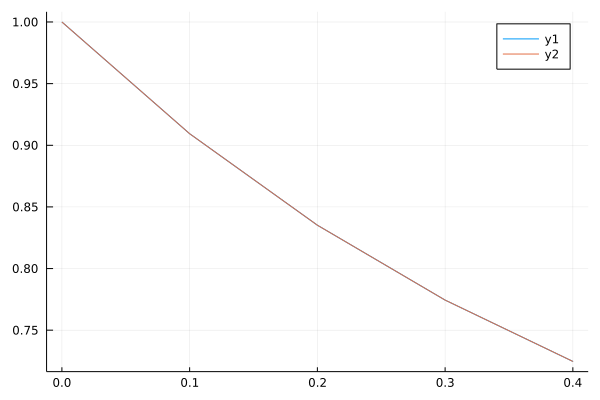

In [155]:
#Uaremos el sistema 
# x' = y-x    
# y' = x-y
# con x(0) = 1 , y(0) = 0
#La solución analítica es:
x(t) = (1+exp(-2*t))/2
y(t) = (1-exp(-2*t))/2

#x(t) = cos(t) 
#y(t) = sin(t)
#g(x, t) = [x[2],x[1]]

g(x, t) = [x[2]-x[1],x[1]-x[2]]

x0 = [1.0,0.0]
X,T = Admas_Bashforth_v(g,x0,20,0.1,10000)
using Plots 
gr()
plot(T,[X[i][1] for i in 1:10000])
plot!(T,x.(T))

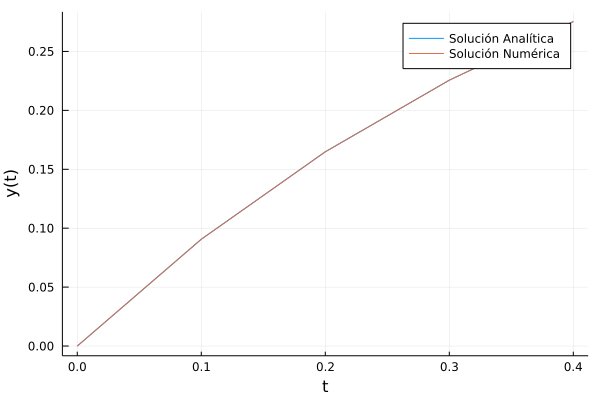

In [156]:
plot(T,y.(T),label="Solución Analítica",xlabel="t",ylabel = "y(t)")
plot!(T,[X[i][2] for i in 1:10000],label="Solución Numérica")


El resto de los ejercicios es aplicar los métodos aprendidos para obtener solución a ecuaciones diferenciales. 

4. **Dificultad media:** (i) Utilizar el método de Euler simple para hacer una (animación) simulación del movimiento browniano de $5$ partículas con un potencial de interacción $U(r)$ de Lennard-Jones (LJ) (https://es.wikipedia.org/wiki/Potencial_de_Lennard-Jones, usa $\epsilon = 1$, $\sigma = 1$), una fuerza de fricción $-\gamma \vec{v}$ y una fuerza externa aleatoria con distribución estandar multiplicada por $\sqrt{k_B T \gamma}$, donde $k_B T$ es la energía términca y $\gamma$ es el coeficiente de fricción del fluido. Utiliza $\gamma = 0.1$ y condiciones iniciales de tal forma que las partículas inicialmente se encuentre a una distancia mayor a $1$ y menor que $2$ de su vecino más cercano y una distancia menor que $5$ de su vecino más lejano. 

(ii) Repite la simulación con las mismas condiciones iniciales y parámetros, excepto por $k_B T$. El potencial de LJ tiende a juntar las partículas, mientras que la fuerza térmica tiende a separarlas ¿a partir de qué valor de $k_B T$ se empieza a ver que las partículas tienden a separarse (y no juntarse)?. Para responder esto grafica la distancia promedio de las partículas como función del tiempo para cada $k_B T$. 


**Nota:** No necesitas responder, pero piensa al respecto. ¿Crees que la $k_B T$ crítica depende de las condiciones iniciales? Los coloides (como la sangre o la gelatina) se pueden simular razonablemente con dinámica Browniana como esta (sólo que con decenas de miles de partículas y con condiciones periódicas a la frontera). ¿Qué crees que signifique la $k_B T$ crítica?

**Solución**

**(i)**
El potencial de Leonar-Jones se expresa como 

$$U(r) = 4\epsilon\left(\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right)$$

de modo que la fuerza entre 2 partículas la fuerza es

$$F(\vec{r}) = -\vec{\nabla}U = 4\epsilon\left(12\frac{\sigma^{12}}{r^{14}}-6\frac{\sigma^6}{r^8}\right)\vec{r}$$

Las ecuaciones que rigen a una sola partícula son 

$$x_i' = v_{xi}$$

$$y_i' = v_{yi}$$

$$v_{xi}' = \frac{1}{m}\sum_{j=1,j\neq i}^5 F_{x}(\vec{r_j}-\vec{r_i}) -\gamma v_{xi} + n(t)$$

$$v_{yi}' = \frac{1}{m}\sum_{j=1,j\neq i}^5 F_{y}(\vec{r_j}-\vec{r_i}) -\gamma v_{yi} + n(t)$$

$n(t)$ es simplemente una variable aleatoria con distribución gaussiana normalizada, producto con $\sqrt{k_BT\gamma}$

Tendremos entonces un sistema de 20 ecuaciones 


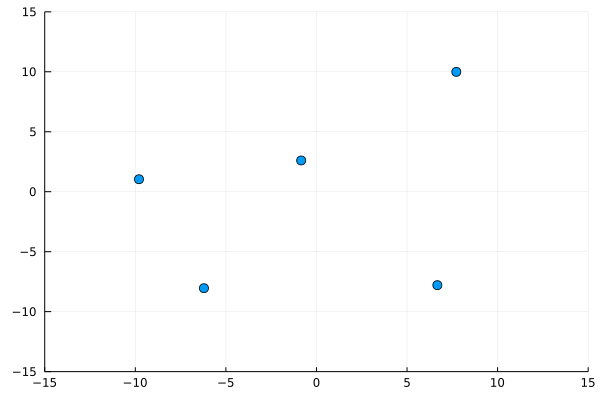

┌ Info: Saved animation to 
│   fn = /home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif
└ @ Plots /home/jigalindo0104/.julia/packages/Plots/Bfn5f/src/animation.jl:104


Plots.AnimatedGif("/home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif")
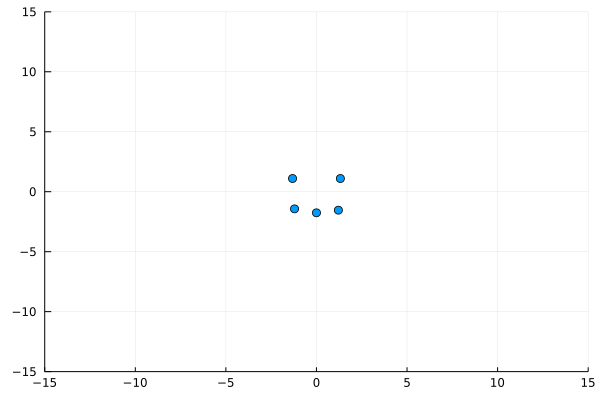

In [211]:
using LinearAlgebra
ϵ = 1
σ = 1
γ = 0.1
kBT = 1
m = 1

F(r) = (4*ϵ*(12*σ^12/norm(r)^14-6*σ^6/norm(r)^8)).*r  
#Ahora las funciones para la ecuación
function fv(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,vx,vy)
    f1 = -F([x2-x1, y2-y1])
    f1-= F([x3-x1, y3-y1])
    f1-= F([x4-x1, y4-y1])
    f1-= F([x5-x1, y5-y1])
    f1 = f1./m - γ.*[vx,vy] + [randn(),randn()].*(sqrt(kBT*γ))
    return f1 
end
#X = [x1,y1,v1x,v1y,x2,y2,v2x,v2y,x3,y3,v3x,v3y,x4,y4,v4x,v4y,x5,y5,v5x,v5y]
f(X,t)=[X[3],X[4],
      fv(X[1],X[2],X[5],X[6],X[9],X[10],X[13],X[14],X[17],X[18],X[3],X[4])[1],
      fv(X[1],X[2],X[5],X[6],X[9],X[10],X[13],X[14],X[17],X[18],X[3],X[4])[2],
      X[7],X[8],
      fv(X[5],X[6],X[1],X[2],X[9],X[10],X[13],X[14],X[17],X[18],X[7],X[8])[1],
      fv(X[5],X[6],X[1],X[2],X[9],X[10],X[13],X[14],X[17],X[18],X[7],X[8])[2],
      X[11],X[12],
      fv(X[9],X[10],X[5],X[6],X[1],X[2],X[13],X[14],X[17],X[18],X[11],X[12])[1],
      fv(X[9],X[10],X[5],X[6],X[1],X[2],X[13],X[14],X[17],X[18],X[11],X[12])[2],
      X[15],X[16],
      fv(X[13],X[14],X[5],X[6],X[9],X[10],X[1],X[2],X[17],X[18],X[15],X[16])[1],
      fv(X[13],X[14],X[5],X[6],X[9],X[10],X[1],X[2],X[17],X[18],X[15],X[16])[2],
      X[19],X[20],
      fv(X[17],X[18],X[5],X[6],X[9],X[10],X[13],X[14],X[1],X[2],X[19],X[20])[1],
      fv(X[17],X[18],X[5],X[6],X[9],X[10],X[13],X[14],X[1],X[2],X[19],X[20])[2]]

t = 30
#X = [x1,y1,v1x,v1y,x2,y2,v2x,v2y,x3,y3,v3x,v3y,x4,y4,v4x,v4y,x5,y5,v5x,v5y]
X0 = 1.1.*[0,-1.6,0.0,0.0,1.2,1,0.0,0.0,-1.2,1.0,0.0,0.0,-1.1,-1.3,0.0,0.0,1.1,-1.4,0.0,0.0]

XX = solucionador_euler(f,X0,t,0.01)

using Plots
gr()
@gif for i=1:50:length(XX)
    xs = [XX[i][1],XX[i][5],XX[i][9],XX[i][13],XX[i][17]]
    ys = [XX[i][2],XX[i][6],XX[i][10],XX[i][14],XX[i][18]]
    scatter(xs,ys,show = :ijulia, key = false,xlim = (-15,15),ylim = (-15,15),markersize = 5)
end



**(ii)**

Haciendo pruebas variando kBT se encontró que para valores superiores a 30 es cuando las partículas tienden a alejarse más rápidamente


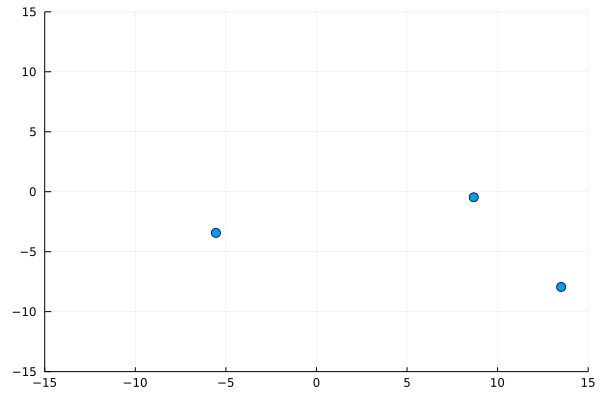

┌ Info: Saved animation to 
│   fn = /home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif
└ @ Plots /home/jigalindo0104/.julia/packages/Plots/Bfn5f/src/animation.jl:104


Plots.AnimatedGif("/home/jigalindo0104/Documents/NotasFisComp/Tareas2/tmp.gif")
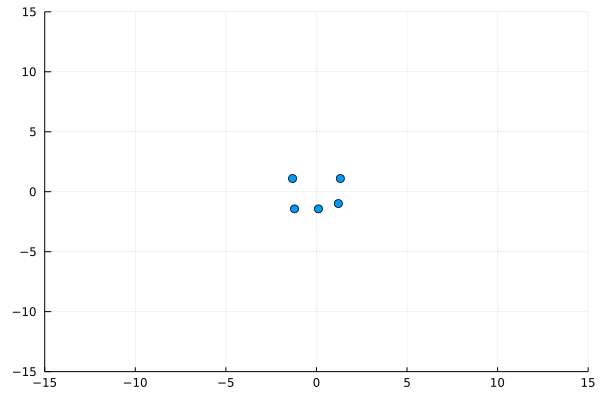

In [218]:
using LinearAlgebra
ϵ = 1
σ = 1
γ = 0.1
kBT = 50
m = 1

F(r) = (4*ϵ*(12*σ^12/norm(r)^14-6*σ^6/norm(r)^8)).*r  
#Ahora las funciones para la ecuación
function fv(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,vx,vy)
    f1 = -F([x2-x1, y2-y1])
    f1-= F([x3-x1, y3-y1])
    f1-= F([x4-x1, y4-y1])
    f1-= F([x5-x1, y5-y1])
    f1 = f1./m - γ.*[vx,vy] + [randn(),randn()].*(sqrt(kBT*γ))
    return f1 
end
#X = [x1,y1,v1x,v1y,x2,y2,v2x,v2y,x3,y3,v3x,v3y,x4,y4,v4x,v4y,x5,y5,v5x,v5y]
f(X,t)=[X[3],X[4],
      fv(X[1],X[2],X[5],X[6],X[9],X[10],X[13],X[14],X[17],X[18],X[3],X[4])[1],
      fv(X[1],X[2],X[5],X[6],X[9],X[10],X[13],X[14],X[17],X[18],X[3],X[4])[2],
      X[7],X[8],
      fv(X[5],X[6],X[1],X[2],X[9],X[10],X[13],X[14],X[17],X[18],X[7],X[8])[1],
      fv(X[5],X[6],X[1],X[2],X[9],X[10],X[13],X[14],X[17],X[18],X[7],X[8])[2],
      X[11],X[12],
      fv(X[9],X[10],X[5],X[6],X[1],X[2],X[13],X[14],X[17],X[18],X[11],X[12])[1],
      fv(X[9],X[10],X[5],X[6],X[1],X[2],X[13],X[14],X[17],X[18],X[11],X[12])[2],
      X[15],X[16],
      fv(X[13],X[14],X[5],X[6],X[9],X[10],X[1],X[2],X[17],X[18],X[15],X[16])[1],
      fv(X[13],X[14],X[5],X[6],X[9],X[10],X[1],X[2],X[17],X[18],X[15],X[16])[2],
      X[19],X[20],
      fv(X[17],X[18],X[5],X[6],X[9],X[10],X[13],X[14],X[1],X[2],X[19],X[20])[1],
      fv(X[17],X[18],X[5],X[6],X[9],X[10],X[13],X[14],X[1],X[2],X[19],X[20])[2]]

t = 30
#X = [x1,y1,v1x,v1y,x2,y2,v2x,v2y,x3,y3,v3x,v3y,x4,y4,v4x,v4y,x5,y5,v5x,v5y]
X0 = 1.1.*[0.1,-1.3,0.0,0.0,1.2,1,0.0,0.0,-1.2,1.0,0.0,0.0,-1.1,-1.3,0.0,0.0,1.1,-0.9,0.0,0.0]

XX = solucionador_euler(f,X0,t,0.01)

using Plots
gr()
@gif for i=1:50:length(XX)
    xs = [XX[i][1],XX[i][5],XX[i][9],XX[i][13],XX[i][17]]
    ys = [XX[i][2],XX[i][6],XX[i][10],XX[i][14],XX[i][18]]
    scatter(xs,ys,show = :ijulia, key = false,xlim = (-15,15),ylim = (-15,15),markersize = 5)
end



5. **Fácil (la explicación es larga, pero el problema es en realidad fácil):** Uno de los primeros modelos de neuronas que se hizo fue el de Hodgkin–Huxley por el cual ambos recibieron el premio Nobel en 1963 y hoy en día este modelo sigue usándose para estudiar el comportamiento de las neuronas en el cerebro. Este modelo considera a cada neurona como un circuito eléctrico donde la superficie de la célula forma un capacitor, y dentro tiene una serie de canales de sodio y potacio que efectivamente forman 3 tipos de resistencias variables (dependen del voltage). 

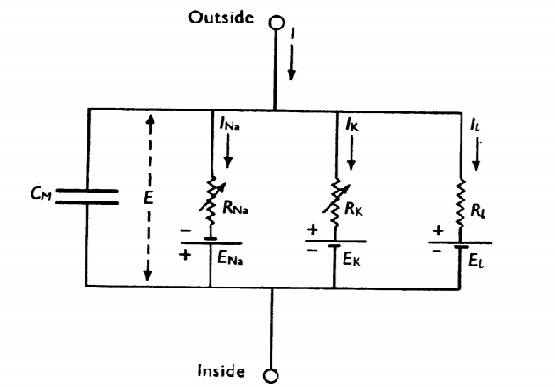

En este circuito las $E_{algo}$ son constantes, igual que $C_m$ y $g_l$. Pero las $g_{Na}$ y $g_K$ no son constantes. Sin embargo se pueden expresar como funciones de los canales de conducción $n$, $m$ y $h$ que representan los canales de potacio, sodio y de fuga respectivamente. Al final la ecuación diferencial que define este circuito es: 
  
$$I = C_m \frac{dV_m}{dt} +g_K n^4 (V_m -V_K) + g_{Na} m^3 h (V_m - V_{Na}) + g_l (V_m -V_l).$$

Aquí $g_K$ y $g_{Na}$ ya son constantes (en realidad son los promedios de las conductividades de potacio y sodio respectivamente). $n$, $m$ y $h$ por otra parte está modelados por: 

$$\frac{dn}{dt} = \alpha_n(V_m) (1-n) - \beta_n(V_m) n, $$

$$\frac{dm}{dt} = \alpha_m(V_m) (1-m) - \beta_m(V_m)m, $$

$$\frac{dh}{dt} = \alpha_h(V_m) (1-h) - \beta_h(V_m)h, $$

donde $\alpha_n(V_m) = \frac{0.01 (10-V_m}{e^{(10-V_m)/10} -1}$, $\alpha_m(V_m) = \frac{0.1 (25-V_m}{e^{(25-V_m)/10} -1}$,
$\alpha_h(V_m) = 0.07 e^{V_m /10}$, $\beta_n(V_m) = 0.125 e^{V_m/80}$, $\beta_m(V_m) = 4 e^{V_m/18}$ y $\beta_h(V_m) = \frac{1}{e^{(30+V_m)/10}+1}$. 

En su artículo Hodgkin y Huxley utilizan los valores $C_m = 1.0$, $V_K \approx 12$, $V_{Na} \approx -115$, $V_l \approx -10.613$, $g_K \approx 36 $, $g_{Na}\approx 120 $ y $g_l \approx 0.3$. 

Además, la corriente y el voltaje están relacionados vía la siguiente ecuación diferencial parcial: 

$$ I = \frac{a}{2R_2} \frac{\partial ^2 V}{\partial x^2} $$

donde $R_2$ es la resistencia del axón y $a$ es el radio de la fibra de conducción del axón, ambos valores son constantes. 

El que se obtenga una ecuación diferencial parcial es molesto, pero si la propagación de la corriente es constante, entonces variar con respecto de la posición el voltaje corresponde a variar con respecto del tiempo, es decir:  

$$ I = \frac{a}{2R_2} \frac{\partial ^2 V}{\partial x^2} \approx  \frac{a}{2R_2 \Theta ^2}\frac{\partial^2 V}{\partial t^2},$$

donde $\Theta$ es la velocidad de conducción de los iones y es una constante por hipótesis. Por lo que la primera ecuación queda como (fijando $x$ para el voltaje y corriente de salida): 

$$\frac{a}{2R_2 \Theta ^2}\frac{d^2 V}{d t^2} = C_m \frac{dV_m}{dt} +g_K n^4 (V_m -V_K) + g_{Na} m^3 h (V_m - V_{Na}) + g_l (V_m -V_l).$$

Donde $\frac{a}{2R_2 \Theta ^2} \approx 10.47 C_m $. 

Dicho todo esto, en este ejercicio se pide que resuelvas esta última ecuación diferencial para obtener  $V_m$ (y por lo tanto $I$) como función del tiempo dado un potencial inicial $V_0$. Utiliza un "buen método" para resolver la ecuación (o sea, no Euler). Recuerda que siempre puedes escribir una ecuación de segundo orden como un sistema de ecuaciones de primer orden.  

**Nota:** Este modelo permite en principio conectar varias neuronas en una red. Entonces, se activa una neurona cualquiera con un potencial inicial suficientemente grande. Eso generará un potencial de salida que activará otras neuronas y así se puede propagar una "onda cerebral". Hay marcapasos cerebrales que simplificadamente detectan determinadas ondas cerebrales y con este modelo generan una "onda inversa" que anule (parte de) la primera. El propósito de estos marcapasos es eliminar sobre-exitación de algunas neuronas que tienen como efecto generar temblorina (resultado de Parkinson). Pueden ver un video de como se ven en funcionamiento estos marcapasos aquí (es INCREÍBLE): https://www.youtube.com/watch?v=34XP72FuvnQ.  

**Solución**


In [241]:
#Primero las constantes según los valores del artículo de Hodgkin y Huxley
Cm  = 1.0;
V_K = 10;
V_Na = -115;
V_l = -10.613;
g_K = 36;
g_Na = 120;
g_l = 0.3;
W = 10.47*Cm ;  #a/(2R_2Θ^2)

#tiempo inicial y final
t0 = 0;
tf = 12;

#las funciones de los coeficientes
α_n(V) = 0.01*(10-V)/(exp((30+V)/10)-1)
α_m(V) = 0.1*(25-V)/(exp((25-V)/10)-1)
α_h(V) = 0.07*exp(V/10)
β_n(V) = 0.125*exp(V/80)
β_m(V) = 4*exp(V/18)
β_h(V) = 1/(exp((30+V)/10)+1)

#Resolveremos usando Runge-Kutta 4
#la función
#X = [n,m,h,V,dV]
f(X,t) = [α_n(X[4])*(1-X[1])-β_n(X[4])*X[1],
        α_m(X[4])*(1-X[2])-β_m(X[4])*X[2],
        α_h(X[4])*(1-X[3])-β_h(X[4])*X[3],
        X[5],
        (Cm*X[5]+g_K*X[1]^4*(X[4]-V_K)+g_Na*X[2]^3*X[3]*(X[4]-V_Na)+g_l*(X[4]-V_l))/W]
X_0(V0) = [0.1,0.2,0.3,V0,0.0]
V0 = 0
XX = RK4(f,X_0(V0),tf,0.01)

1201-element Array{Array{Float64,1},1}:
 [0.1, 0.2, 0.3, 0.0, 0.0]
 [0.09992220616114375, 0.1939178383316079, 0.3003475218384441, 0.0001685256636965793, 0.03324943793474166]
 [0.09984450986386974, 0.18808711526227703, 0.3006946564842498, 0.0006563347686961711, 0.06390125601148429]
 [0.09976690753673918, 0.18249735507155432, 0.30104142355634594, 0.0014387404453688503, 0.09220870165457262]
 [0.09968939587769356, 0.17713853271766608, 0.3013878411784435, 0.002493454909301809, 0.11839884380369572]
 [0.09961197182840491, 0.1720010525342033, 0.3017339261242588, 0.0038003420788127614, 0.14267539759609305]
 [0.09953463255121575, 0.1670757281825454, 0.3020796939476791, 0.005341196832066329, 0.16522123402265515]
 [0.09945737540839888, 0.16235376375565386, 0.3024251590995123, 0.007099547938170226, 0.18620061072452943]
 [0.0993801979434958, 0.157826735940665, 0.302770335032274, 0.00906048203643821, 0.20576115581925356]
 [0.09930309786451798, 0.1534865771579242, 0.3031152342943019, 0.011210486337723

In [227]:
XX[1][2]

0.1

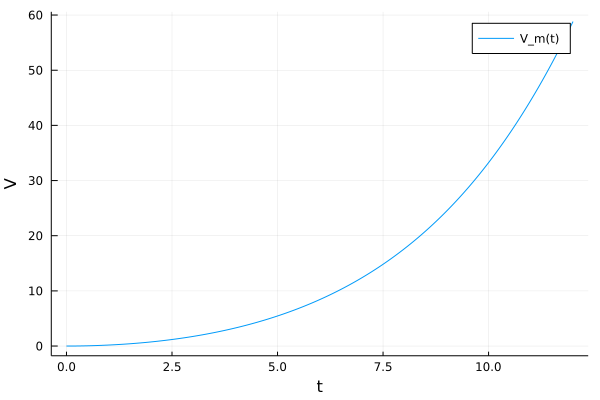

In [239]:
s = length(XX)-1
tiempo = 0:tf/(s-1):tf
using Plots
gr()
plot(tiempo,[XX[i][4] for i in 1:s],xlabel = "t",ylabel = "V", label = "V_m(t)")

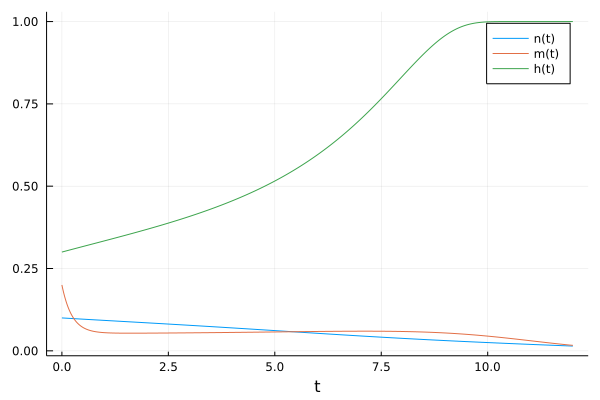

In [244]:
plot(tiempo,[XX[i][1] for i in 1:s],label = "n(t)",xlabel = "t")
plot!(tiempo,[XX[i][2] for i in 1:s],label = "m(t)",xlabel = "t")
plot!(tiempo,[XX[i][3] for i in 1:s],label = "h(t)",xlabel = "t")

6. **Retador:** El péndulo doble se puede describir utilizando 2 ángulos y 2 momentos angulares. Esto significa que su espacio fáse es 4-dimensional. Por supuesto, un espacio 4D no es posible visualizarlo. Si fijamos la energía del sistema, una de las variables queda determinada en términos de la otras: 

(i) Utilizando las ecuaciones de Hamilton (y el Hamiltoniano del péndulo doble), escribe las 3 ecuaciones diferenciales que determinan al sistema al escribir el momento angular de la segunda masa del péndulo $p_{\theta_2}$ en términos de la energía $H$, el momento angular de la priemera masa $p_{\theta_1}$, el ángulo de la primera masa $\theta_1$ y el ángulo de la segunda masa $\theta_2$. (No tienes que deducir tú todas las ecuaciones, puedes basarte por ejemplo en: https://diego.assencio.com/?index=e5ac36fcb129ce95a61f8e8ce0572dbf y simplemente despejar $p_{\theta_2}$ de la ecuación de H (ecuación 13 del vínculo), después sustituir $p_{\theta_2}$ en las ecuaciones de movimiento (ecuaciones 14, 15 y 16, (la 17 ya no es necesaria!, queda sustituída por el despeje de la ecuación 13)) para que todas queden en términos de $\theta_1$, $\theta_2$ y $p_{\theta_1}$). 

Visualizar un espacio fase 3D sigue siendo difícil. Una alternativa es hacer un mapeo de Poincaré, es decir, "seguir" la trayectoria del sistema en el espacio fase y observar cuándo curza un determinado plano y sólo graficar los puntos de ese plano (el corte del espacio fase). Por ejemplo, fiajrnos cuándo $\theta_2 = 0$ y cuando eso suceda poner un punto en el plano $\theta_1, p_{\theta_1}$.

(ii) Resuelve el sistema de ecuaciones del punto (i) (la energía se va a mantener, porque fijamos $H$ y con ello se obtiene el valor de $p_{\theta_2}$) durante un tiempo suficiente como para tener al menos 1000 puntos del mapeo de Poincaré (aunque entre más puntos mejor) dada una energía. Prueba repetir esto para varias condiciones iniciales con la misma energía (unas 10-15 condiciones iniciales diferentes), graficando cada mapa de Poincaré encima del anterior. 

(iii) Repite el punto (ii) para varias energías (para cada energía una gráfica nueva con unas 10-15 trayectorias). Comienza por una energía relativamente pequeña (casi debería verse la simulación como un péndulo normal), y llega a una energía de tal forma que $\theta_1$ pueda recorrer $2\pi$ (o sea, que el péndulo pueda llegar a dar la vuelta completa).   

De ver el mapeo de Poincaré para cada energía, ¿puedes identificar para qué valores de la energía el sistema es caótico y para que valores no lo es?

**Nota 1:** Te recomiendo (no es obligatorio) hacer 3 animaciones del péndulo, una para una energía muy pequeña, uno para una energía justo antes de que se vuelva caótico el sistema y uno para cuando el sistema es caótico. ¿cuál te gusta más su movimiento? (y ¿por qué te gusta más?)

**Nota 2:** No necesitas responder, pero piénsa al respecto: ¿Crees que sea importante la longitud y masas de los péndulos? ¿Hay sistemas para los que el péndulo se mantiene no-caótico para un mayor número de valores? Si sí, ¿Hay algún péndulo doble que sea el "menos caótico de todos" y alguno que sea el "más caótico de todos"? 


**Solución**

**(i)**

Partiendo de la ecuación 13 del hiperbínculo, 
Sea
$$A = 2m_2l_2^2l_2^2[m_1+m_2\sin^2(\theta_1-\theta_2)]$$
 
$$B  = (m_1+m_2)gl_1\cos(\theta_1)+m_2gl_2\cos(\theta_2)$$

$$C = m_2l_2^2p_{\theta_1}^2$$

$$D = 2m_2l_1l_2p_{\theta_1}cos(\theta_1-\theta_2)$$

$$E = (m_1+m_2)l_1^2$$ 
Entonces

$$H = \frac{C+Ep_{\theta_2}^2-Dp_{\theta_2}}{A}-B$$

$$\implies Ep_{\theta_2}^2-Dp_{\theta_2}-[(H+B)A -C]= 0 $$

$$\implies p_{\theta_2}=\frac{D \pm \sqrt{D^2+4E[(H+B)A -C]}}{2E} $$

Nos quedamos con la solución positiva y sustituiremos en las ecuaciones 14,15 y 16


In [55]:
#Solución
#Primero, los valores de los momento angulares y las masas
l_1 = 1;
l_2 = 1;
m_1 = 1;
m_2 = 1;
g = 9.8;
#Ahora los coeficientes A, B, C, D y E
A(θ_1,θ_2) = 2*m_2*l_2^2*l_2^2*(m_1+m_2*sin(θ_1-θ_2)^2)
B(θ_1,θ_2) = (m_1+m_2)*g*l_1*cos(θ_1)+m_2*g*l_2*cos(θ_2)
C(p_1) = m_2*l_2*p_1^2
D(p_1,θ_1,θ_2)=2*m_2*l_1*l_2*p_1*cos(θ_1-θ_2)
E = (m_1+m_2)*l_1^2

#Luego, la función de p_θ2
function p_2_pos(p_1,θ_1,θ_2,H) 
    @show (B(θ_1,θ_2)+H)*A(θ_1,θ_2)-C(p_1)
    try
        return (D(p_1,θ_1,θ_2)+sqrt(D(p_1,θ_1,θ_2)^2+4*E*((H+B(θ_1,θ_2))-C(p_1))))/(2*E)
    
    catch
        return 0
    end
end    
#Ahora las funciones h_1 y h_2 de las ecuaciones 18 y 19
h_1(p_1,θ_1,θ_2,H) = (p_1*p_2_pos(p_1,θ_1,θ_2,H)*sin(θ_1-θ_2))/(l_1*l_2*(m_1+m_2*sin(θ_1-θ_2)^2))
h_2(p_1,θ_1,θ_2,H) = (C(p_1)-E*p_2_pos(p_1,θ_1,θ_2,H)^2-D(p_1,θ_1,θ_2)*p_2_pos(p_1,θ_1,θ_2,H))/A(θ_1,θ_2)

#Finalmente, sustituimos en 14, 15 y 16  

f_θ1(p_1,θ_1,θ_2,H)=(l_1*p_1-l_1*p_2_pos(p_1,θ_1,θ_2,H)*cos(θ_1-θ_2))/(l_1^2*l_2*(m_1+m_2*sin(θ_1-θ_2)^2))
f_θ2(p_1,θ_1,θ_2,H)=(-m_2*l_2*p_1*cos(θ_1-θ_2)+(m_1+m_2)*l_1*p_2_pos(p_1,θ_1,θ_2,H))/(m_2*l_1*l_2*(m_1+m_2*sin(θ_1-θ_2)^2))
f_p1(p_1,θ_1,θ_2,H)=-(m_1+m_2)*g*l_1*sin(θ_1)+h_1(p_1,θ_1,θ_2,H)-h_2(p_1,θ_1,θ_2,H)*sin(2*(θ_1-θ_2))


f_p1 (generic function with 1 method)

Con esto tenemos un sistema de ecuaciones 

$$\theta_1' = f_{\theta_1}(p_{\theta_1},\theta_1,\theta_2)$$

$$\theta_2' = f_{\theta_2}(p_{\theta_1},\theta_1,\theta_2)$$

$$p_{\theta_1}' = f_{p_{\theta_1}}(p_{\theta_1},\theta_1,\theta_2)$$

**(ii)**

Ahora vamos a resolver el sistema utilizando el problema 2 (taylor varias dimensiones de grado 3), Definiremos la energía como $H = 1$

In [163]:
#Utilizaremos Taylor de N dimensiones para resolver. grado 4.

H =  1

#Ahora la solunción con Taylor
#X = [p_1(t),θ_1(t),θ_2(t),t]
F(X::Array{<:Real,1}) = [f_θ1(X[1],X[2],X[3],H);f_θ1(X[1],X[2],X[3],H);f_θ2(X[1],X[2],X[3],H);1] 
X0 = [0.0;0.0;0.0]
#@show (B(X0[2],X0[2])+H)*A(X0[2],X0[2])-C(X0[1])
t0 = 0;
time = 10;
XsolTaylor = solucionador_Taylor_ND(3,3,F,X0,t0,time)
P1 = XsolTaylor[1,:];
θ2 = XsolTaylor[2,:];
θ1 = XsolTaylor[3,:];
T = XsolTaylor[4,:];
plot(P1,θ1,θ2)

LoadError: [91mUndefVarError: f_θ1 not defined[39m

7.**Muy Fácil:** Revisa aquí: https://modelo.covid19.cdmx.gob.mx/modelo-epidemico el modelo epidemeológico de la CDMX. Escribe las ecuaciones, con los parámetros que ahí dan y resuelve el modelo con algún solucionador "bueno". 

**Nota:** No necesitas responder, pero piensa al respecto. ¿La simulación se acerca algo a lo que sucedió en la ciudad? ¿Al menos se acerca a los primeros meses? ¿Cómo se podría mejorar este modelo?

In [195]:
#De las ecuaciones del modelo, tomaremos la última para escribir 
#a la Unidad de Terapia intensiva (ICU) en términos de lo demás

D_infect = 2.9 #Tiempo que es infeccioso el paciente (dias) 
D_incub = 5.2 #Tiempo de incubación (dias)
p_grave = 0.138 #taza de hospitalización
D_RL = 14 #Tiempo de recuperación de casos leves (dias)
D_hosp = 4 #Tiempo entre presencia de síntomas y hospitalización en casos graves (días)
p_icu = 0.05 #Tasa de UCI
D_RH = 12 #Tiempo entre hospitalización de casos graves no UCI y recuperación (días)
p_M = 0.03 #Taza de letalidad
D_icu = 1 #Tiempo entre hospitalización de casos graves e ingreso a UCI (días) 
D_Ricu = 7 #Tiempo entre ingreso a UCI y recuperación (días) 
D_M = 8 #Tiempo entre ingreso a UCI y deceso (días) 
N = 22 #Población susceptible (millones)
R_0 = 2.83 

#    S = Susceptibles
#    E = Expuestos
#    I = Infectados
#    L = Contagiados sintomáticos leves
#    G = Contagiados sintomáticos graves
#    H = Hospitalizados
#    ICU = Unidad de Terapia Intensiva
#    R = Recuperados
#    M = Muertos

#X = [S,E,I,L,G,H,R,M]

X0 = [1.0;1.0;0.0;0.0;0.0;0.0;0.0;0.0]
ICU(X) = 1-sum(X)
Epidemia(X)=[(-R_0/D_infect)*X[3]*X[1];
        (R_0/D_infect)*X[3]*X[1]-(1/D_incub)*X[2];
        (1/D_incub)*X[2]-(1/D_infect)*X[3];
        (1-p_grave)*(1/D_infect)*X[3]-(1/D_RL)*X[4];
        p_grave*(1/D_infect)*X[3]-(1/D_hosp)*X[5];
        (1/D_hosp)*X[5]-((1-p_icu)*(1/D_RH)-p_icu*(1/D_icu))*X[6];
        (1/D_RL)*X[4]+(1-p_icu)*(1/D_RH)*X[6]+(1-p_M)*(1/D_Ricu)*ICU(X);
        p_M*(1/D_M)*ICU(X);1]

#Usaremos el método de Taylor grado 3 (Del problema 2)

Xsol  = solucionador_Taylor_ND(8,3,Epidemia,X0,0.0,30)
    

9×3001 Array{Float64,2}:
 1.0   0.999991     0.999963     0.999916     …    0.00378327    0.00378275
 1.0   0.998088     0.996199     0.994331          0.0115946     0.0115728
 0.0   0.00191793   0.0038256    0.0057231         0.0138917     0.0138661
 0.0   2.85229e-6   1.13861e-5   2.55671e-5        0.442625      0.44235
 0.0   4.56359e-7   1.82067e-6   4.0858e-6         0.00735487    0.0073431
 0.0   3.813e-10    3.03953e-9   1.02346e-8   …    0.164997      0.164967
 0.0  -0.00139165  -0.00279517  -0.00421053      -21.9995      -22.0087
 0.0  -3.76607e-5  -7.56426e-5  -0.000113945      -0.636657     -0.636919
 0.0   0.01         0.02         0.03             29.99         30.0

In [196]:
t = Xsol[9,:]
plot(t,Xsol[3,:],label = "infectados")
plot!(t,Xsol[1,:],label = "Suceptibles")
plot!(t,Xsol[8,:],label = "Muertos")
